# Clustering New York's Boroughs  based on the Citizens' Service Requests (311 Calls)

This is notebook contains the code used for the IBM Capstone. This includes the data cleaning, data visualization, exploratory data analysis, and machine learning for the clustering.


Importing the python libraries to be used

In [52]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
from pprint import pprint
import folium 
import matplotlib.cm as cm 
import matplotlib.colors as colors 
from pandas.io.json import json_normalize 
from collections import Counter  
from sklearn.cluster import KMeans 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch

Importing the pickled dataframes of the service requests data and the data with the coordinates for each of the boroughs of New York. <br> 
This part was performed on a separate Jupyter Notebook because of the size of the files. Importing the orginal raw .csv file for the service requests which is more than 1.4 million rows of data makes it harder to run the code. 

In [53]:
service_df = pd.read_pickle(r'service_final_df')

In [54]:
service_df_dummy = pd.read_pickle(r'data_df')

In [57]:
count_df = service_df.Borough.value_counts()
count_df

QUEENS           195164
BROOKLYN         187361
MANHATTAN        140978
BRONX             88976
STATEN ISLAND     44144
Name: Borough, dtype: int64

In [56]:
service_df['Complaint Type'].describe()

count                      656623
unique                        137
top       Street Related Concerns
freq                       151803
Name: Complaint Type, dtype: object

([<matplotlib.patches.Wedge at 0x7fa5e4b2b370>,
 [Text(0.6543005819466589, 0.8842458642618939, 'Queens'),
  Text(-1.0224841509311426, 0.4056182455149431, 'Brooklyn'),
  Text(-0.4054837387212027, -1.022537499377248, 'Manhattan'),
  Text(0.7275386203877459, -0.8250379117618146, 'Bronx'),
  Text(1.0755567672199702, -0.2306027764085404, 'Staten Island')],
 [Text(0.35689122651635935, 0.48231592596103295, '30%'),
  Text(-0.5577186277806232, 0.2212463157354235, '29%'),
  Text(-0.22117294839338325, -0.5577477269330443, '21%'),
  Text(0.39683924748422494, -0.4500206791428079, '14%'),
  Text(0.5866673275745291, -0.1257833325864766, '7%')])

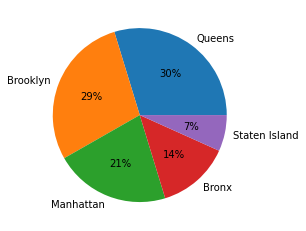

In [6]:
plt.pie(count_df, labels = ['Queens','Brooklyn','Manhattan','Bronx', 'Staten Island'],autopct='%1.0f%%')

In [48]:
service_count = service_df.groupby('Complaint Type').count().reset_index()
service_count = service_count.sort_values(by= 'Borough',ascending= False)
service_count = service_count[0:10]
service_count

,Complaint Type,Borough
111,Street Related Concerns,151803
134,Water Related Concerns,67965
120,Traffic Signal Condition,46197
19,Construction,34097
9,Blocked Driveway,28943
30,Dirty Conditions,22996
14,Building/Use,19787
77,Noise Complaint,19432
99,Sanitation Condition,18770
75,Noise - Street/Sidewalk,15524


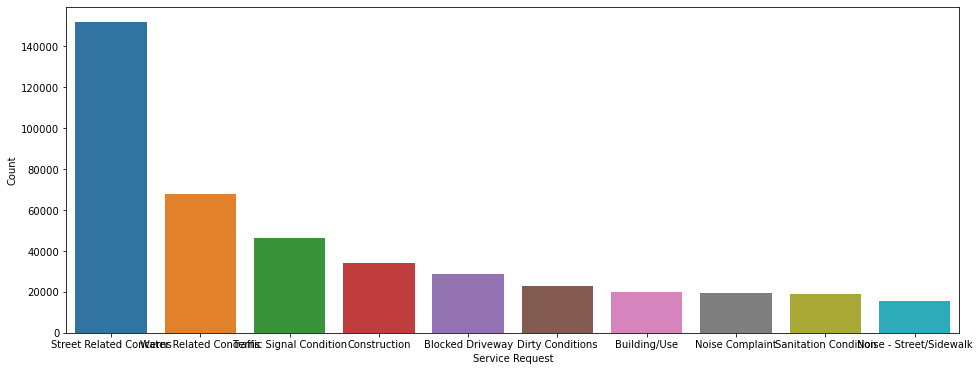

In [51]:
plt.figure(figsize=(16, 6))
ax =sns.barplot(y='Borough', x= 'Complaint Type',data= service_count, ci=0)
ax.set(xlabel='Service Request', ylabel='Count')
plt.show()

Creating the dummy columns for each of the type of service request

In [6]:
borough_group = service_df_dummy.groupby('Borough').sum().reset_index()
borough_group

,Borough,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike/Roller/Skate Chronic,Blocked Driveway,Boilers,Bottled Water,Bridge Condition,Broken Meter,Building/Use,Bus Stop Shelter Placement,Calorie Labeling,City Vehicle Placard Complaint,Collection Truck Noise,Construction,Consumer Complaint,Cranes and Derricks,DOE Complaint or Compliment,DOF Property - City Rebate,DOF Property - Owner Issue,DOF Property - Payment Issue,DOF Property - RPIE Issue,Damaged Tree,Dead Tree,Derelict Vehicles,Dirty Conditions,Discipline and Suspension,Disorderly Youth,Drinking,Drinking Water,Electrical,Elevator,Emergency Response Team (ERT),Food Establishment,Food Poisoning,For Hire Vehicle Complaint,Forensic Engineering,Found Property,Graffiti,HEATING,Harboring Bees/Wasps,Hazardous Materials,Health,Highway Condition,Highway Sign - Damaged,Highway Sign - Dangling,Highway Sign - Missing,Homeless Encampment,Illegal Animal - Sold/Kept,Illegal Animal Kept as Pet,Illegal Animal Sold,Illegal Fireworks,Illegal Tree Damage,Indoor Air Quality,Industrial Waste,Investigations and Discipline (IAD),Lead,Legal Services Provider Complaint,Lifeguard,Litter Basket / Request,Maintenance or Facility,Miscellaneous Categories,Missed Collection (All Materials),Mold,Municipal Parking Facility,NONCONST,No Child Left Behind,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Noise Complaint,Non-Residential Heat,Other Enforcement,Overflowing Litter Baskets,Overgrown Tree/Branches,PAINT - PLASTER,PLUMBING,Panhandling,Parent Leadership,Plant,Plumbing,Poison Ivy,Portable Toilet,Posting Advertisement,Public Payphone Complaint,Public Toilet,Radioactive Material,Recycling Enforcement,Registration and Transfers,Rodent,Root/Sewer/Sidewalk Condition,Safety,Sanitation Condition,Scaffold Safety,School Maintenance,Senior Center Complaint,Sidewalk Condition,Smoking,Snow,Special Enforcement,Special Natural Area District (SNAD),Special Projects Inspection Team (SPIT),Squeegee,Stalled Sites,Street Related Concerns,Street Sign - Damaged,Street Sign - Dangling,Street Sign - Missing,Summer Camp,Sweeping/Missed-Inadequate,Tattooing,Taxi Complaint,Teaching/Learning/Instruction,Traffic Signal Condition,Trans Fat,Transportation Provider Complaint,Trapping Pigeon,Tree Work Permit Request,Tunnel Condition,Unleashed Dog,Unsanitary Animal Facility,Unsanitary Animal Pvt Property,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Related Concerns,Window Guard,X-Ray Machine/Equipment
0,BRONX,1.0,1.0,506.0,0.0,252.0,113.0,82.0,17.0,15.0,4645.0,289.0,3.0,65.0,364.0,2223.0,24.0,1.0,32.0,14.0,3116.0,1470.0,34.0,128.0,27.0,17.0,50.0,0.0,1220.0,577.0,2132.0,3796.0,107.0,272.0,136.0,7.0,367.0,1674.0,109.0,435.0,153.0,459.0,0.0,4.0,2940.0,17.0,27.0,187.0,51.0,223.0,7.0,1.0,0.0,85.0,1.0,20.0,1.0,15.0,78.0,514.0,134.0,118.0,94.0,0.0,1.0,192.0,890.0,90.0,814.0,7.0,5.0,2.0,5.0,1299.0,92.0,198.0,2596.0,1803.0,1506.0,103.0,264.0,73.0,1008.0,6.0,13.0,6.0,11.0,22.0,316.0,8.0,8.0,27.0,66.0,0.0,0.0,62.0,40.0,2233.0,515.0,150.0,2363.0,25.0,76.0,38.0,385.0,100.0,555.0,1.0,0.0,115.0,0.0,4.0,23296.0,274.0,87.0,228.0,7.0,58.0,7.0,269.0,63.0,6644.0,0.0,1.0,0.0,13.0,0.0,90.0,3.0,251.0,48.0,22.0,219.0,228.0,315.0,9139.0,170.0,1.0
1,BROOKLYN,4.0,3.0,1137.0,13.0,284.0,237.0,245.0,35.0,54.0,11100.0,417.0,4.0,117.0,1248.0,4475.0,59.0,2.0,61.0,23.0,10709.0,2861.0,111.0,159.0,59.0,62.0,178.0,8.0,3143.0,1182.0,4551.0,6312.0,117.0,275.0,219.0,8.0,1016.0,1255.0,526.0,927.0,380.0,280.0,2.0,24.0,3138.0,33.0,21.0,437.0,81.0,500.0,6.0,2.0,2.0,296.0,7.0,30.0,6.0,27.0,219.0,947.0,289.0,306.0,462.0,8.0,4.0,665.0,1931.0,38.0,3008.0,27.0,16.0,11.0,5.0,3441.0,334.0,510.0,4168.0,3561.0,4386.0,213.0,978.0,349.0,2614.0,10.0,5.0,7.0,7.0,125.0,494.0,8.0,17.0,124.0,160.0,3.0,2.0,254.0,41.0,3888.0,1295.0,169.0,7037.0,67.0,151.0,41.0,1318.0,292.0,2211.0,348.0,0.0,387.0,2.0,11.0,44

In [7]:
def return_common(row, num_top_requests):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_requests]

In [8]:
num_top_requests = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_requests):
    try:
        columns.append('{}{} Most Common Request'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Request'.format(ind+1))  

In [9]:
# create a new dataframe
borough_request_sorted = pd.DataFrame(columns= columns)
borough_request_sorted['Borough'] = borough_group['Borough']

In [10]:
for i in np.arange(5):
    borough_request_sorted.iloc[i,1:]= return_common(borough_group.iloc[i, :],num_top_requests)

borough_request_sorted

,Borough,1st Most Common Request,2nd Most Common Request,3rd Most Common Request,4th Most Common Request,5th Most Common Request,6th Most Common Request,7th Most Common Request,8th Most Common Request,9th Most Common Request,10th Most Common Request
0,BRONX,Street Related Concerns,Water Related Concerns,Traffic Signal Condition,Blocked Driveway,Dirty Conditions,Construction,Graffiti,Noise - Street/Sidewalk,Sanitation Condition,Rodent
1,BROOKLYN,Street Related Concerns,Water Related Concerns,Traffic Signal Condition,Blocked Driveway,Construction,Sanitation Condition,Dirty Conditions,Derelict Vehicles,Building/Use,Noise Complaint
2,MANHATTAN,Street Related Concerns,Traffic Signal Condition,Noise Complaint,Water Related Concerns,Taxi Complaint,Construction,Broken Meter,Noise - Commercial,Noise - Street/Sidewalk,Noise - Vehicle
3,QUEENS,Street Related Concerns,Water Related Concerns,Traffic Signal Condition,Blocked Driveway,Building/Use,Construction,Dirty Conditions,Derelict Vehicles,Sanitation Condition,Damaged Tree
4,STATEN ISLAND,Street Related Concerns,Water Related Concerns,Construction,Missed Collection (All Materials),Derelict Vehicles,Sanitation Condition,Dirty Conditions,Building/Use,Snow,Damaged Tree


### Clustering the Boroughs of New York 

In [11]:
features = borough_group.drop('Borough',1)
features

,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike/Roller/Skate Chronic,Blocked Driveway,Boilers,Bottled Water,Bridge Condition,Broken Meter,Building/Use,Bus Stop Shelter Placement,Calorie Labeling,City Vehicle Placard Complaint,Collection Truck Noise,Construction,Consumer Complaint,Cranes and Derricks,DOE Complaint or Compliment,DOF Property - City Rebate,DOF Property - Owner Issue,DOF Property - Payment Issue,DOF Property - RPIE Issue,Damaged Tree,Dead Tree,Derelict Vehicles,Dirty Conditions,Discipline and Suspension,Disorderly Youth,Drinking,Drinking Water,Electrical,Elevator,Emergency Response Team (ERT),Food Establishment,Food Poisoning,For Hire Vehicle Complaint,Forensic Engineering,Found Property,Graffiti,HEATING,Harboring Bees/Wasps,Hazardous Materials,Health,Highway Condition,Highway Sign - Damaged,Highway Sign - Dangling,Highway Sign - Missing,Homeless Encampment,Illegal Animal - Sold/Kept,Illegal Animal Kept as Pet,Illegal Animal Sold,Illegal Fireworks,Illegal Tree Damage,Indoor Air Quality,Industrial Waste,Investigations and Discipline (IAD),Lead,Legal Services Provider Complaint,Lifeguard,Litter Basket / Request,Maintenance or Facility,Miscellaneous Categories,Missed Collection (All Materials),Mold,Municipal Parking Facility,NONCONST,No Child Left Behind,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Noise Complaint,Non-Residential Heat,Other Enforcement,Overflowing Litter Baskets,Overgrown Tree/Branches,PAINT - PLASTER,PLUMBING,Panhandling,Parent Leadership,Plant,Plumbing,Poison Ivy,Portable Toilet,Posting Advertisement,Public Payphone Complaint,Public Toilet,Radioactive Material,Recycling Enforcement,Registration and Transfers,Rodent,Root/Sewer/Sidewalk Condition,Safety,Sanitation Condition,Scaffold Safety,School Maintenance,Senior Center Complaint,Sidewalk Condition,Smoking,Snow,Special Enforcement,Special Natural Area District (SNAD),Special Projects Inspection Team (SPIT),Squeegee,Stalled Sites,Street Related Concerns,Street Sign - Damaged,Street Sign - Dangling,Street Sign - Missing,Summer Camp,Sweeping/Missed-Inadequate,Tattooing,Taxi Complaint,Teaching/Learning/Instruction,Traffic Signal Condition,Trans Fat,Transportation Provider Complaint,Trapping Pigeon,Tree Work Permit Request,Tunnel Condition,Unleashed Dog,Unsanitary Animal Facility,Unsanitary Animal Pvt Property,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Related Concerns,Window Guard,X-Ray Machine/Equipment
0,1.0,1.0,506.0,0.0,252.0,113.0,82.0,17.0,15.0,4645.0,289.0,3.0,65.0,364.0,2223.0,24.0,1.0,32.0,14.0,3116.0,1470.0,34.0,128.0,27.0,17.0,50.0,0.0,1220.0,577.0,2132.0,3796.0,107.0,272.0,136.0,7.0,367.0,1674.0,109.0,435.0,153.0,459.0,0.0,4.0,2940.0,17.0,27.0,187.0,51.0,223.0,7.0,1.0,0.0,85.0,1.0,20.0,1.0,15.0,78.0,514.0,134.0,118.0,94.0,0.0,1.0,192.0,890.0,90.0,814.0,7.0,5.0,2.0,5.0,1299.0,92.0,198.0,2596.0,1803.0,1506.0,103.0,264.0,73.0,1008.0,6.0,13.0,6.0,11.0,22.0,316.0,8.0,8.0,27.0,66.0,0.0,0.0,62.0,40.0,2233.0,515.0,150.0,2363.0,25.0,76.0,38.0,385.0,100.0,555.0,1.0,0.0,115.0,0.0,4.0,23296.0,274.0,87.0,228.0,7.0,58.0,7.0,269.0,63.0,6644.0,0.0,1.0,0.0,13.0,0.0,90.0,3.0,251.0,48.0,22.0,219.0,228.0,315.0,9139.0,170.0,1.0
1,4.0,3.0,1137.0,13.0,284.0,237.0,245.0,35.0,54.0,11100.0,417.0,4.0,117.0,1248.0,4475.0,59.0,2.0,61.0,23.0,10709.0,2861.0,111.0,159.0,59.0,62.0,178.0,8.0,3143.0,1182.0,4551.0,6312.0,117.0,275.0,219.0,8.0,1016.0,1255.0,526.0,927.0,380.0,280.0,2.0,24.0,3138.0,33.0,21.0,437.0,81.0,500.0,6.0,2.0,2.0,296.0,7.0,30.0,6.0,27.0,219.0,947.0,289.0,306.0,462.0,8.0,4.0,665.0,1931.0,38.0,3008.0,27.0,16.0,11.0,5.0,3441.0,334.0,510.0,4168.0,3561.0,4386.0,213.0,978.0,349.0,2614.0,10.0,5.0,7.0,7.0,125.0,494.0,8.0,17.0,124.0,160.0,3.0,2.0,254.0,41.0,3888.0,1295.0,169.0,7037.0,67.0,151.0,41.0,1318.0,292.0,2211.0,348.0,0.0,387.0,2.0,11.0,44119.0,1248.0,226.0,733.

In [12]:
sum_of_squared_distances = []
K = range(1,6)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(features)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 

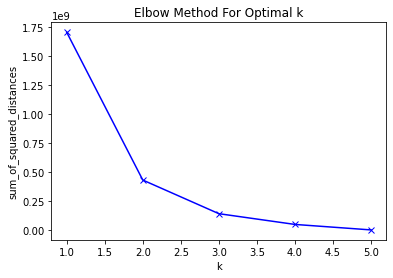

In [13]:
plt.plot(range(1,6), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

In [14]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(features)

print(Counter(kmeans.labels_))

Counter({0: 2, 1: 2, 2: 1})


In [15]:
borough_request_sorted.insert(0,'Cluster Labels', kmeans.labels_)

In [16]:
borough_request_sorted

,Cluster Labels,Borough,1st Most Common Request,2nd Most Common Request,3rd Most Common Request,4th Most Common Request,5th Most Common Request,6th Most Common Request,7th Most Common Request,8th Most Common Request,9th Most Common Request,10th Most Common Request
0,0,BRONX,Street Related Concerns,Water Related Concerns,Traffic Signal Condition,Blocked Driveway,Dirty Conditions,Construction,Graffiti,Noise - Street/Sidewalk,Sanitation Condition,Rodent
1,1,BROOKLYN,Street Related Concerns,Water Related Concerns,Traffic Signal Condition,Blocked Driveway,Construction,Sanitation Condition,Dirty Conditions,Derelict Vehicles,Building/Use,Noise Complaint
2,2,MANHATTAN,Street Related Concerns,Traffic Signal Condition,Noise Complaint,Water Related Concerns,Taxi Complaint,Construction,Broken Meter,Noise - Commercial,Noise - Street/Sidewalk,Noise - Vehicle
3,1,QUEENS,Street Related Concerns,Water Related Concerns,Traffic Signal Condition,Blocked Driveway,Building/Use,Construction,Dirty Conditions,Derelict Vehicles,Sanitation Condition,Damaged Tree
4,0,STATEN ISLAND,Street Related Concerns,Water Related Concerns,Construction,Missed Collection (All Materials),Derelict Vehicles,Sanitation Condition,Dirty Conditions,Building/Use,Snow,Damaged Tree


## For the map of New York Boroughs 

In [17]:
geo_shape = gpd.read_file('new-york-city-boroughs.geojson')
geo_shape

,name,cartodb_id,created_at,updated_at,geometry
0,Staten Island,1,2013-03-09T02:42:03.692000+00:00,2013-03-09T02:42:03.989000+00:00,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,Queens,2,2013-03-09T02:42:03.692000+00:00,2013-03-09T02:42:03.989000+00:00,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,Brooklyn,3,2013-03-09T02:42:03.692000+00:00,2013-03-09T02:42:03.989000+00:00,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,Manhattan,4,2013-03-09T02:42:03.692000+00:00,2013-03-09T02:42:03.989000+00:00,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,Bronx,5,2013-03-09T02:42:03.692000+00:00,2013-03-09T02:42:03.989000+00:00,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [18]:
geo_shape['Cluster']= borough_request_sorted['Cluster Labels']
geo_shape

,name,cartodb_id,created_at,updated_at,geometry,Cluster
0,Staten Island,1,2013-03-09T02:42:03.692000+00:00,2013-03-09T02:42:03.989000+00:00,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",0
1,Queens,2,2013-03-09T02:42:03.692000+00:00,2013-03-09T02:42:03.989000+00:00,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...",1
2,Brooklyn,3,2013-03-09T02:42:03.692000+00:00,2013-03-09T02:42:03.989000+00:00,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...",2
3,Manhattan,4,2013-03-09T02:42:03.692000+00:00,2013-03-09T02:42:03.989000+00:00,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",1
4,Bronx,5,2013-03-09T02:42:03.692000+00:00,2013-03-09T02:42:03.989000+00:00,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",0


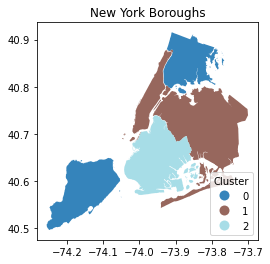

In [19]:
fig, ax = plt.subplots()

geo_shape.plot(ax=ax, column='Cluster',
              categorical = True, legend= True, 
               legend_kwds = {'title':'Cluster', 'loc':'lower right'},
              cmap = 'tab20', alpha=0.9)


ax.set(
    title='New York Boroughs', 
    aspect=1.3,
    facecolor='white'
);